<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
demographics = pd.read_csv("airbnb_data/demographics.csv")
econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")

In [3]:
dataset_names = ["calendar", "demographics", "econ_state", "listings", "real_estate", "venues"]
datasets = [calendar, demographics, econ_state, listings, real_estate, venues]

In [6]:
for i in range(len(datasets)):
    print(dataset_names[i])
    print(datasets[i].keys())
    print()

calendar
Index(['listing_id', 'date', 'available', 'price', 'metro_area'], dtype='object')

demographics
Index(['zipcode', '5_years_or_less', '5-9_years', '10-14_years', '15-19_years',
       '20-24_years', '25-34_years', '35-44_years', '45-54_years',
       '55-59_years', '60-64_years', '65-74_years', '75-84_years',
       '85_years_or_more', 'households', '$9,999_or_less', '$10,000-$14,999',
       '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999',
       '$50,000-$64,999', '$65,000-$74,999', '$75,000-$99,999',
       '$100,000_or_more', 'median_household_income', 'mean_household_income'],
      dtype='object')

econ_state
Index(['state', '2005Q1_gdp', '2005Q2_gdp', '2005Q3_gdp', '2005Q4_gdp',
       '2006Q1_gdp', '2006Q2_gdp', '2006Q3_gdp', '2006Q4_gdp', '2007Q1_gdp',
       ...
       '2016/03_ur', '2016/04_ur', '2016/05_ur', '2016/06_ur', '2016/07_ur',
       '2016/08_ur', '2016/09_ur', '2016/10_ur', '2016/11_ur', '2016/12_ur'],
      dtype='object', length=519)

listings
In

In [23]:
demographics[demographics["zipcode"] // 1000 == 10]

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
2558,10001,23537,562,1089,900,1053,2785,4970,3905,2795,...,8.6,4.1,9.3,5.1,9.2,8.5,9.8,27.5,86801,158183
2559,10002,80736,3079,3171,3638,3922,5338,13938,12055,11182,...,15.5,12.6,14,8.8,10,14.2,7.1,31.3,33726,61946
2560,10003,57112,1545,911,764,7308,5714,15565,7843,5718,...,6.1,1.9,7,4.9,6.4,13,11.3,30.7,98151,161692
2561,10004,3221,126,101,161,227,255,857,572,387,...,2.2,0.3,1.7,6.5,5.1,7.1,14.8,27,119691,177262
2562,10005,8131,299,250,140,85,1101,3690,1696,631,...,7.9,0.8,4.5,1.9,1.4,9,9.9,20.3,124194,176424
2563,10006,3110,267,47,25,24,354,1455,557,234,...,6.9,5.2,0,0.7,3.2,15.7,6.6,25.5,123691,162688
2564,10007,6876,342,483,229,287,241,1777,1628,940,...,2.9,1.4,0.6,0.7,3.8,5.9,5.3,15,"250,000+",441278
2565,10009,60865,1491,1838,1604,2220,6338,15577,7390,8248,...,12.7,7.7,9.6,7.2,8.4,12.3,11.2,31.9,59090,85207
2566,10010,31447,1014,611,588,1411,4081,8332,4648,3936,...,7.8,3.9,4.9,4,5.5,13.2,9.4,28.1,101718,154979
2567,10011,52349,1982,1676,1185,1046,2500,13532,9643,6481,...,5.3,2.9,5.7,4.8,7.7,9.6,8.4,25.7,109818,196817


In [25]:
econ_state

,state,2005Q1_gdp,2005Q2_gdp,2005Q3_gdp,2005Q4_gdp,2006Q1_gdp,2006Q2_gdp,2006Q3_gdp,2006Q4_gdp,2007Q1_gdp,...,2016/03_ur,2016/04_ur,2016/05_ur,2016/06_ur,2016/07_ur,2016/08_ur,2016/09_ur,2016/10_ur,2016/11_ur,2016/12_ur
0,AL,153332,155940,157437,160293,161934,163974,165470,166495,166821,...,6.6,6.6,6.6,6.7,6.7,6.7,6.6,6.6,6.6,6.6
1,AK,37517,38907,40691,43138,42872,44653,45349,45840,46658,...,5.9,5.8,5.8,5.8,5.8,5.9,6.0,6.1,6.2,6.3
2,AZ,218206,224496,231629,235099,241787,244659,250886,256505,258078,...,4.1,4.1,4.1,4.1,4.0,4.0,4.0,4.0,4.0,3.9
3,AR,88446,89264,90515,93050,93413,95259,95481,95203,94289,...,5.5,5.4,5.3,5.3,5.2,5.1,5.1,5.0,5.0,5.0
4,CA,1722091,1747827,1787427,1809426,1857944,1865835,1886549,1907754,1915172,...,5.6,5.5,5.5,5.5,5.4,5.4,5.3,5.3,5.3,5.2
5,CO,216906,218710,222780,223421,229476,229632,234160,234411,237933,...,3.3,3.3,3.4,3.4,3.4,3.3,3.2,3.1,3.0,3.0
6,CT,207262,210134,210233,213052,221025,220596,220677,223380,235095,...,5.4,5.4,5.3,5.2,5.1,4.9,4.8,4.6,4.5,4.4
7,DE,52121,51156,51480,58232,55333,56670,56397,55606,56466,...,6.2,6.1,6.1,6.1,6.0,6.0,5.9,5.8,5.8,5.7
8,DC,82522,83530,83845,84446,86260,86981,89166,87577,90741,...,4.4,4.4,4.4,4.4,4.4,4.3,4.3,4.3,4.3,4.3
9,FL,680384,690146,713393,717145,733443,740698,747163,763377,760435,...,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9


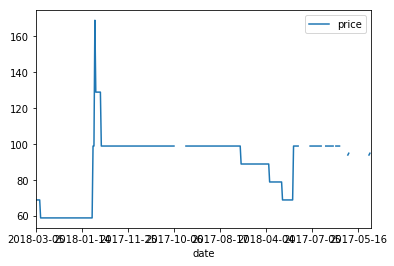

In [42]:
calendar.loc[calendar["listing_id"] == 2515].plot(x="date", y="price")

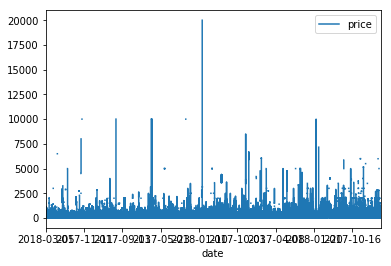

In [41]:
calendar.plot(x="date", y="price")
plt.show()

In [31]:
zipcodes = pd.read_csv("NYZipCodes.csv")
zipcodes = zipcodes[zipcodes["City"] == "New York"]